In [1]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

2024-03-14 12:40:23.484539: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 12:40:24.158095: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-03-14 12:40:24.158145: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-03-14 12:40:24.158151: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
link = "Resultados/ResultadoCompleto/V3"
linkGuardadoDecoder = "Resultados/ResultadoCompleto/V6W10"

archivoData = "PredictionsConvolutionLSTM_forecast_60_180_EspacioLatente_w10.npy"
linkDecodificador = "Resultados/ResultadoCompleto/V6W10/Decoder.h5"

In [3]:
data = np.load("Resultados/ResultadoCompleto/V6W10/PredictionsConvolutionLSTM_forecast_60_180_EspacioLatente_w10.npy")
#data = data/255
print("data" , link+archivoData)
print("data shape",data.shape)

data Resultados/ResultadoCompleto/V3PredictionsConvolutionLSTM_forecast_60_180_EspacioLatente_w10.npy
data shape (374, 9, 60, 180, 1)


<Figure size 2000x2000 with 0 Axes>

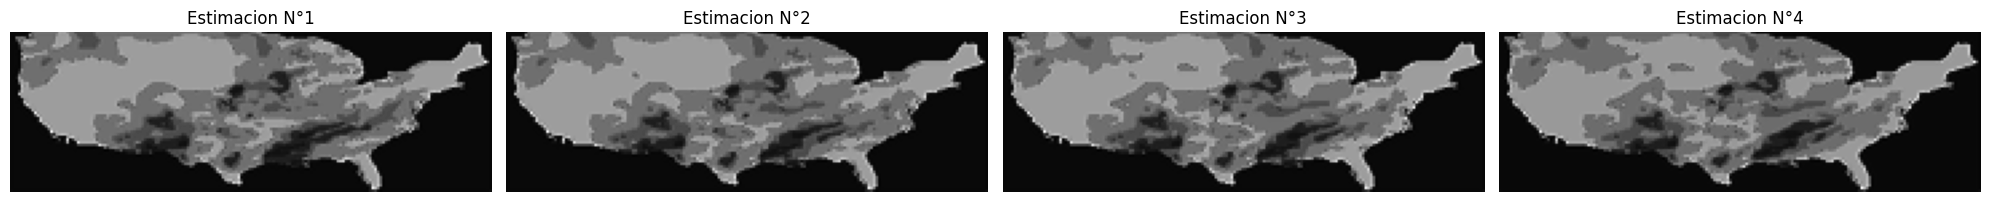

In [4]:
fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 373
horizon = 4

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(data[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1
plt.tight_layout()
plt.show()

In [5]:
# carga del decodor 
decoder = keras.models.load_model(linkDecodificador)
print (decoder.summary())

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 180, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 180, 8)        80        
                                                                 
 up_sampling2d (UpSampling2D  (None, 120, 360, 8)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 360, 1)       73        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


2024-03-14 12:40:37.274249: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-14 12:40:37.274682: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-14 12:40:37.279341: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-14 12:40:37.279789: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-14 12:40:37.280288: I tensorflow/compiler/xla/stream_executo

In [6]:
decorderData = decoder.predict(data[pos])

results = np.zeros((374, 4, 120, 360, 1))

for i in range(data.shape[0]):
    # Selecciona los últimos 4 marcos de cada muestra
    last_4_frames = data[i, -4:, :, :, :]
    #datas255 = data[i, :, :, :, :]
    # Realiza la predicción utilizando los últimos 4 marcos
    result = decoder.predict(last_4_frames)
    
    # Guarda el resultado en el arreglo de resultados
    results[i] = result
    print("result N°",i, "shape", result.shape)


#guardar resultado
np.save(linkGuardadoDecoder+"/resultadosDecoder.npy", results)

2024-03-14 12:40:50.073333: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-03-14 12:40:50.490303: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


1/1 [==============================] - 0s 35ms/step
result N° 0 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 15ms/step
result N° 1 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 15ms/step
result N° 2 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 3 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 4 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 5 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 6 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 15ms/step
result N° 7 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 8 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 9 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 10 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 

In [7]:
print("decorderData shape",results.shape)

decorderData shape (374, 4, 120, 360, 1)


In [8]:
np.save(linkGuardadoDecoder+"/ResultadosEstimacionDecodificacionSinCategorico.npy", results)

<Figure size 2000x2000 with 0 Axes>

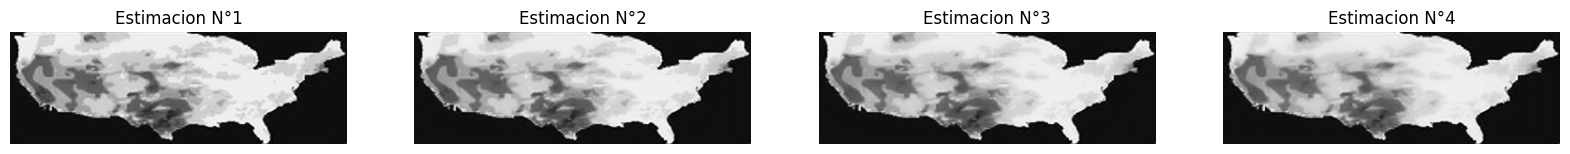

In [9]:


fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 300

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(results[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1

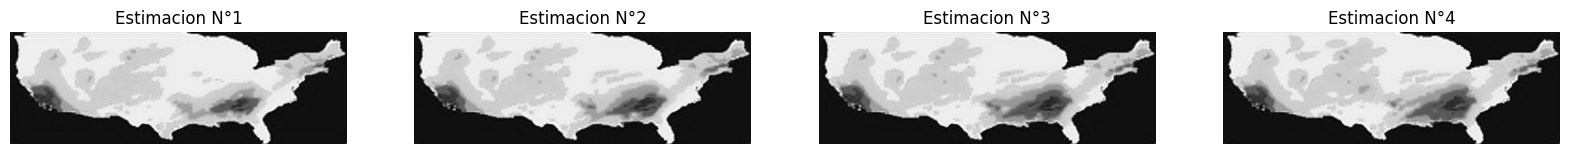

In [10]:
#show ech decoded image
fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(results[i][0], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1

posicion 300


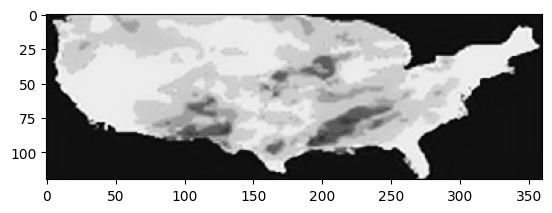

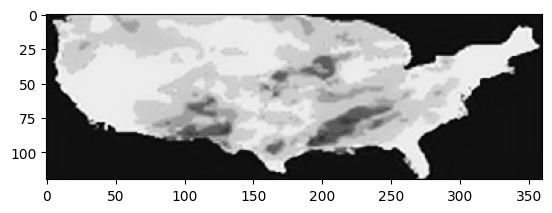

In [11]:
#mostrar la primer imagen
print("posicion", pos)
plt.imshow(decorderData[5], cmap='gray')
plt.show()
plt.imshow(result[0], cmap='gray')
plt.show()

In [12]:
valoresUnicos = np.unique(results[0])
print("valoresUnicos",valoresUnicos)
print("leng val",len(valoresUnicos))
print("max",np.max(results[0]))
print("min",np.min(results[0]))

valoresUnicos [0.00982392 0.01011488 0.01027726 ... 0.97829527 0.97835082 0.97948807]
leng val 158139
max 0.9794880747795105
min 0.00982392206788063


# prueba


In [24]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle


#Obtiene los n colores principales mediante kmeans
def principal_colors(img, n_colors):
  photo = img
  photo = photo/255
  w,h,d = tuple(photo.shape)
  #assert d == 3
  photo = photo.reshape(w*h, d)
  photo_sample = shuffle(photo, random_state=0)[:1000]
  kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(photo_sample)
  labels = kmeans.predict(photo)
  return labels, kmeans

#Recrea una imagen comprimida por la función de kmaens por un codebook
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

#Función para transformar y obtener los colores principales de una imagen
def n_colors_img(img, n_colors):
  labels, model = principal_colors(img, n_colors)
  w,h,d = tuple(img.shape)
  print(labels)
  res = recreate_image(model.cluster_centers_, labels, w, h)
  res = np.round(res*255).astype(np.uint8)
  return res

#Toma todos los colores existentes en la imagen
def get_colors(image):
  aux = []
  band = True
  for i in image:
    for j in i:
      for k in aux:
        if j.tolist() == k:
          band = False
          break
      if band:
        aux.append(j.tolist())
      band = True
  return np.array(aux)

In [30]:
aux = last_4_images[0]
res = n_colors_img(aux, 6)
print("shape res",res.shape)
colors = get_colors(res)
print("colors",colors)

[0 0 0 ... 0 0 0]
shape res (120, 360, 1)
colors [[0]
 [1]]


/home/mccdual2080/anaconda3/envs/cropImage/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    x = np.load('Models/DroughtDatasetMask.npy').astype(np.uint8) #/255
    x = np.array([gray_quantized(i, np.array(categories)) for i in x])
    colors_greys = get_colors(x[1168])
    print(colors_greys)
    x_greys = np.array([recolor_greys_image(img, categories) for img in x])
    x = x_greys.astype('float32') / 255
    print(get_colors(x[1168]))
    ------------------------------------------------
    x = np.load("Models/Data_full_select_color.npy") * 255
    x = x.astype(np.uint8)
    #Obtención de la paleta de colores, se toma una imagen muestra
    aux = x[1168]
    res = n_colors_img(aux, 6)
    colors = get_colors(res).reshape(6,1,3)
    print(len(colors))
    #Se utiliza una función de cuantificación en las imágenes para que
    # todas las imágenes manejen una paleta de colores.
    aux_data = np.array([rgb_quantized(i, colors) for i in x])
    print(aux_data.shape)
    #Se comprueban los colores obtenidos
    c1 = get_colors(aux_data[0])
    c2 = get_colors(aux_data[1167])
    print(c1)
    print(c2)
    #Se transforma el dataset de colores a escala de grieses, cv2 para mejor calidad.
    x_greys = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in aux_data])
    #np.save('Models/Data_full_select_greys.npy', x_greys)
    colors_greys = get_colors(x_greys[1168])
    cg1 = get_colors(x_greys[0])
    cg2 = get_colors(x_greys[1167])
    print(cg1)
    print(cg2)
    a1 = x_greys[0]
    a2 = x_greys[1167]
    x_greys = np.array([balance_img_categories(img, colors_greys, categories) for img in x_greys])
    ig1 = x_greys[0]
    ig2 = x_greys[1167]
    print(get_colors(ig1))
    print(get_colors(ig2))
    x = x_greys.astype('float32') / 255

In [ ]:
#Función para dada una paleta solo tomar los colores de esa paleta en la imagen
def quantizetopalette(silf, palette, dither=False, mode="P"):
  """Convert an RGB or L mode image to use a given P image's palette."""
  silf.load()
  palette.load()
  im = silf.im.convert(mode, 0, palette.im)
  # the 0 above means turn OFF dithering making solid colors
  return silf._new(im)

def gray_quantized(img, palette):
  rows, cols = len(img), len(img[0])
  total_vals = 1
  for i in palette.shape:
    total_vals *= i
  palettedata = palette.reshape(total_vals).tolist()
  palImage = Image.new('L', (rows, cols))
  palImage.putpalette(palettedata*32)
  oldImage = Image.fromarray(img, 'L')
  newImage = quantizetopalette(oldImage,palImage, mode="L")
  res_image = np.asarray(newImage)
  return res_image

#Crea cubos con su propia información de tamaño h
def get_cubes(data, h):
    new_data = []
    for i in range(0, len(data)-h):
        new_data.append(data[i:i+h])
    new_data = np.array(new_data)
    print(new_data.shape)
    return new_data

def recolor_greys_image(data, palette):
    rows, cols = len(data), len(data[0])
    aux = np.zeros((rows, cols), dtype=np.uint64)
    for i in range(rows):
        for j in range(cols):
            aux[i,j] = min(palette, key= lambda x:abs(x-data[i,j]))
    return aux


print ("data",data.shape)
print ("ResultadosEspacioLatenteV1/"+carpeta+"/"+str(rows)+"_"+str(cols)+parte+"/PredictionsConvolutionLSTM_forecast_"+str(rows)+"_"+str(cols)+"_"+parte+"_w5.npy")
classes = np.array([0, 255, 220, 177, 119, 70, 35]) # 255, 220, 177, 119, 70, 35  0
classes_rgb = np.array([[0,0,0], [35,35,35], [70,70,70], [119,119,119], [177,177,177], [220,220,220], [255,255,255]])
rows = len(x_test[0,0])
cols= len(x_test[0,0,0])
print(rows)
print(cols)
h = 4

print(data.shape)
print(x_test.shape)
print(y_test.shape)

y_test = get_cubes(y_test, h)

colors = get_colors(x_test[-10,0])
print("COLORSS", colors)
print("COLORS", colors.shape)
colorss = get_colors(data[-10,0])
print("COLORSS", colorss)
naive = x_test[:-4]
data = data[1:-3]

#y_real = y_test[:, -h:]*255
new_data = data[:, -h:]
n_real = naive[:, -h:]*255

#y_test = y_test[:, -h:]
naive = naive[:, -h:]

print("XX")
print(y_test.shape)
print(new_data.shape)
print(n_real.shape)

#cambio 60 a 40
print(min(new_data[0,0,30]))
print(max(new_data[0,0,30]))

new_data = new_data * 255
new_data = new_data.astype(np.uint8)

print("new_data", new_data.shape)
print(colorss.shape)
print(min(new_data[0,0,30]))
print(max(new_data[0,0,30]))

new_data = new_data.reshape(new_data.shape[:-1])
print("HoY", new_data.shape)

aux = []
for i in new_data:
    aux2 = []
    for j in i:
        #res = cv2.cvtColor(j, cv2.COLOR_GRAY2RGB)
        #res = recolor_greys_image(j, classes)
        #rgb_quantized(res, classes_rgb)
        #res = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
        res = gray_quantized(j, classes)
        res = recolor_greys_image(res, classes)
        aux2.append(res)
    aux.append(np.array(aux2))


new_data = np.array(aux)
print("SHAPEE", new_data.shape)
color_data = get_colors(new_data[-10,0])
print("DCOLORS", color_data)
new_data = new_data.reshape(new_data.shape[0],new_data.shape[1],new_data.shape[2],new_data.shape[3],1)

y_test = y_test * 255
naive = naive * 255

print("YCOLORS", get_colors(y_test[-10,0]))
print("NCOLORS", get_colors(naive[-10,0]))
print("DCOLORS", get_colors(new_data[-10,0]))

print("XS")
print(f"new data shape {new_data.shape}")
print(f"y_test.shape {y_test.shape}")
print(f"new data shape {naive.shape}")

l_clas = len(classes)

#print 
print (f"lengeth x_test: {y_test.shape[0]}")
print (f"h: {h}")
print (f"rows: {rows}")
print (f"cols: {cols}")

cm_f = np.zeros((l_clas, l_clas), dtype=np.uint64)
cm_n = np.zeros((l_clas, l_clas), dtype=np.uint64)
print(cm_f)

for e in range(y_test.shape[0]):
    for k in range(h):
        for i in range(rows):
            for j in range(cols):
                #print(f"e: {e}, k: {k}, i: {i}, j: {j}")
                pos1 = np.where(classes == y_test[e, k, i, j])[0][0]
                pos2 = np.where(classes == new_data[e, k, i, j])[0][0]
                pos3 = np.where(classes == naive[e, k, i, j])[0][0]
                cm_f[pos1, pos2] += 1
                cm_n[pos1, pos3] += 1

print("Matriz de confusión de pronóstico")
print(cm_f)
print("Matriz de confusión de naive")
print(cm_n)

import pandas as pd

# Convert cm_f numpy array to pandas DataFrame
df_cm_f = pd.DataFrame(cm_f)

#print(df_cm_f)
df_cm_n = pd.DataFrame(cm_n)
#print(df_cm_n)
# Crear el DataFrame de la primera matriz de confusión como antes
df_cm_f = pd.DataFrame(cm_f, index=[f'True_{i}' for i in range(len(cm_f))],
                               columns=[f'Pred_{i}' for i in range(len(cm_f[0]))])

# Crear el DataFrame de la segunda matriz de confusión como antes
df_cm_n = pd.DataFrame(cm_n, index=[f'True_{i}' for i in range(len(cm_n))],
                               columns=[f'Pred_{i}' for i in range(len(cm_n[0]))])

# Calcular el desplazamiento necesario para la segunda matriz (longitud de la primera matriz + 2 por la columna vacía)
offset = df_cm_f.shape[1] + 2

# Crear un escritor de Excel
with pd.ExcelWriter("DroughtDatasetMask/ResultadosEspacioLatente/"+carpeta+"/"+str(rows)+"_"+str(cols)+parte+"/combined_confusion_matrices.xlsx") as writer:
    # Escribir la primera matriz en la hoja de cálculo empezando en la primera columna
    df_cm_f.to_excel(writer, startcol=0, index=True)

# Escribir la segunda matriz en la hoja de cálculo con un desplazamiento
df_cm_n.to_excel(writer, startcol=offset, index=True)